# Exercise 2

● Construct a J/𝛙 and 𝛙(2S) + background PDF

   ○J/𝛙with a Crystal Ball function
   
   ○𝛙(2S) with a similar(spoiler!) 
   
   ○Crystal Ball○Background with a polynomial
   
   
●For now, the 𝛙(2S) will involve a very small amount of signal events

●Fit it, plot it, save it   

In [1]:
import ROOT

Welcome to JupyROOT 6.20/06


Este arquivo contém a medição da massa invariante do dimuon para os eventos selecionados

In [2]:
file = ROOT.TFile( '/eos/home-m/matheus/DataSet_lowstat.root' )
dataset = file.Get("data")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# Definindo o observável do problema  

Como estamos diante de um problema unidimensional, e o observável é a massa invariante do sistema dimuônico, vamos usar as ferramentas do *RooFit* extraindo a classe *RooRealVar*

In [3]:
mass = ROOT.RooRealVar("mass","#mu^{+}#mu^{-} invariant mass",2.,6.,"GeV")

# Parametrizando o sinal do $J/\Psi$

Vamos usar o Crystal Ball

In [4]:
meanJpsi = ROOT.RooRealVar("meanJpsi","The mean of the Jpsi Gaussian",3.1,2.8,3.2) # J/Psi mean 
sigmaJpsi = ROOT.RooRealVar("sigmaJpsi","The width of the Jpsi Gaussian",0.3,0.0001,1.) # J/Psi error
alphaJpsi = ROOT.RooRealVar("alphaJpsi","The alpha of the Jpsi Gaussian",1.5,-5.,5.) #
nJpsi = ROOT.RooRealVar("nJpsi","The alpha of the Jpsi Gaussian",1.5,0.5,5.)

In [5]:
print('\n',
       meanJpsi,'\n',
       sigmaJpsi,'\n',
       alphaJpsi,'\n',
       nJpsi,'\n' )


 RooRealVar::meanJpsi = 3.1  L(2.8 - 3.2) 
 
 RooRealVar::sigmaJpsi = 0.3  L(0.0001 - 1) 
 
 RooRealVar::alphaJpsi = 1.5  L(-5 - 5) 
 
 RooRealVar::nJpsi = 1.5  L(0.5 - 5) 
 



Definindo uma PDF para o modelo do sinal

In [6]:
CBJpsi = ROOT.RooCBShape( "CBJpsi","The Jpsi Crystall Ball", mass , meanJpsi , sigmaJpsi , alphaJpsi , nJpsi )

In [7]:
print(CBJpsi)

RooCBShape::CBJpsi[ m=mass m0=meanJpsi sigma=sigmaJpsi alpha=alphaJpsi n=nJpsi ] = 0.011109



# Parametrização do sinal $\Psi(2S)$

A largura será semelhante ao núcleo $J/\Psi$ do Crystal Ball (quase gaussiano)

In [8]:
meanpsi2S = ROOT.RooRealVar("meanpsi2S","The mean of the psi(2S) Gaussian",3.7,3.6,3.8)
gausspsi2S = ROOT.RooGaussian("gausspsi2S","The psi(2S) Gaussian",mass,meanpsi2S,sigmaJpsi)

In [9]:
print('\n',
      
      "The mean of the psi(2S) Gaussian ---> " , meanpsi2S, '\n',
      "The psi(2S) Gaussian ---> " , gausspsi2S
     )


 The mean of the psi(2S) Gaussian --->  RooRealVar::meanpsi2S = 3.7  L(3.6 - 3.8) 
 
 The psi(2S) Gaussian --->  RooGaussian::gausspsi2S[ x=mass mean=meanpsi2S sigma=sigmaJpsi ] = 0.606531



# Fit do Background por polinômio

In [10]:
a1 = ROOT.RooRealVar("a1","The a1 of background",-0.7,-2.,2.)
a2 = ROOT.RooRealVar("a2","The a2 of background",0.3,-2.,2.)
a3 = ROOT.RooRealVar("a3","The a3 of background",-0.03,-2.,2.)
backgroundPDF = ROOT.RooPolynomial("backgroundPDF","The background PDF",mass,ROOT.RooArgList(a1,a2,a3))

In [11]:
print( 
       '\n',
    
       "a1 -->", a1,'\n',
       "a2 -->", a2,'\n',
       "a3 -->", a3,'\n',
)


 a1 --> RooRealVar::a1 = -0.7  L(-2 - 2) 
 
 a2 --> RooRealVar::a2 = 0.3  L(-2 - 2) 
 
 a3 --> RooRealVar::a3 = -0.03  L(-2 - 2) 
 



In [12]:
NJpsi = ROOT.RooRealVar("NJpsi","The Jpsi signal events",1500.,0.1,10000.)
Npsi = ROOT.RooRealVar("Npsi","The psi signal events",100.,0.1,5000.)
Nbkg = ROOT.RooRealVar("Nbkg","The bkg events",5000.,0.1,50000.)

In [13]:
print('\n',
      "The Jpsi signal events --> ", NJpsi , '\n',
      "The psi signal events --> ", Npsi , '\n',
      "The background events --> ", Nbkg , '\n'
     )


 The Jpsi signal events -->  RooRealVar::NJpsi = 1500  L(0.1 - 10000) 
 
 The psi signal events -->  RooRealVar::Npsi = 100  L(0.1 - 5000) 
 
 The background events -->  RooRealVar::Nbkg = 5000  L(0.1 - 50000) 
 



O PDF total é uma combinação linear dos diferentes componentes com pesos proporcionais a *NJpsi* , *Npsi* e *Nbkg*. Isso é implementado no *RooFit* na classe *RooAddPdf*. Observe que as listas de PDF e rendimentos são passadas por meio da classe RooArgList

In [14]:
totPDF = ROOT.RooAddPdf("totPDF","The total PDF",ROOT.RooArgList(CBJpsi,gausspsi2S,backgroundPDF),ROOT.RooArgList(NJpsi,Npsi,Nbkg))

# Realizando o Fit

In [15]:
totPDF.fitTo(dataset, ROOT.RooFit.Extended(1))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (CBJpsi,gausspsi2S,backgroundPDF)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 NJpsi        1.50000e+03  7.49950e+02    1.00000e-01  1.00000e+04
     2 Nbkg         5.00000e+03  2.49995e+03    1.00000e-01  5.00000e+04
     3 Npsi         1.00000e+02  4.99500e+01    1.00000e-01  5.00000e+03
     4 a1          -7.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     5 a2           3.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     6 a3          -3.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
     7 alphaJpsi    1.50000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     8 meanJpsi     3.10000e+00  4.00000e-02    2.80000e+00  3.20000e+00
     9 meanpsi2S    3.

# Imprimir valores dos parâmetros (que agora refletem os valores ajustados e erros)

In [16]:
meanpsi2S.Print()
NJpsi.Print()
Npsi.Print()

RooRealVar::meanpsi2S = 3.60392 +/- 0.0441657  L(3.6 - 3.8) 
RooRealVar::NJpsi = 153.223 +/- 19.7887  L(0.1 - 10000) 
RooRealVar::Npsi = 0.1 +/- 1.27202  L(0.1 - 5000) 


O resultado do ajuste é impresso como a saída normal do Minuit

# Plotando os dados e o resultado do Fit

# Fazendo o plot

Info in <TCanvas::Print>: pdf file JPsi_InvMass_Fit.pdf has been created


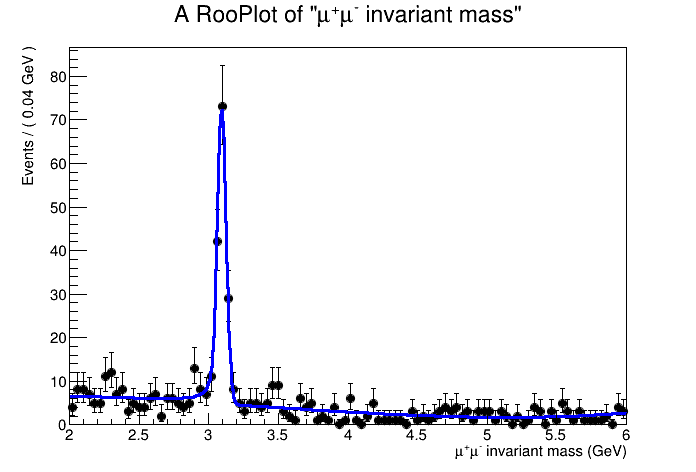

In [17]:
xframe = mass.frame()
dataset.plotOn(xframe)
totPDF.plotOn(xframe)

c1 = ROOT.TCanvas()
xframe.Draw()
c1.SaveAs("JPsi_InvMass_Fit.pdf")
c1.Draw()

In [18]:
ws = ROOT.RooWorkspace("ws")
getattr(ws,'import')(dataset)
getattr(ws,'import')(totPDF)

fOutput = ROOT.TFile("mumufit_Jpsi_ex2.root","RECREATE")
ws.Write()
fOutput.Write()
fOutput.Close()

[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing dataset data
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooAddPdf::totPDF
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooCBShape::CBJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::meanJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::sigmaJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::alphaJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::nJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::NJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooGaussian::gausspsi2S
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::meanpsi2S
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::Npsi
[#1] INFO:Obj